# Sales Prediction

Given historical sales data from from January 2013 to October 2015 of certain items (item_id) in certain shops (shop_id), forecast the sales for November 2015.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#item_categories = pd.read_csv("data/item_categories.csv")
#display(item_categories.head())
items = pd.read_csv("data/items.csv.zip")
display(items.head())
sales_train = pd.read_csv("data/sales_train.csv.zip")
display(sales_train.head())
#shops = pd.read_csv("data/shops.csv")
#display(shops.head())

# for later
#test = pd.read_csv("data/test.csv.zip")
#display(test.head())
#sample_submission = pd.read_csv("data/sample_submission.csv.zip")
#display(sample_submission.head())

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


### Save some memory adjusting types

In [5]:
display(sales_train.shape)
display(sales_train.describe())
display(sales_train.dtypes)
display(sales_train.memory_usage(deep = True).sum())
sales_train =  sales_train.assign(
        date = pd.to_datetime(sales_train.date),
        date_block_num = sales_train.date_block_num.astype('int8'),
        shop_id = sales_train.shop_id.astype('int8')
    )
display(sales_train.memory_usage(deep=True).sum())

(2935849, 6)

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


date              datetime64[ns]
date_block_num              int8
shop_id                     int8
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

99818994

99818994

In [6]:
items.describe()
items = items.assign(item_category_id = items.item_category_id.astype('int8'))

### Join item categories with train set

In [10]:
features = ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day']
train_joined = sales_train[features].join(items[['item_id', 'item_category_id']], on='item_id', how = 'inner', rsuffix='_other').drop(columns='item_id_other')
train_joined.set_index('date', inplace=True)
display(train_joined)

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
date,,,,,,
2013-02-01,0,59,22154,999.0,1.0,37
2013-01-23,0,24,22154,999.0,1.0,37
2013-01-20,0,27,22154,999.0,1.0,37
2013-02-01,0,25,22154,999.0,1.0,37
2013-03-01,0,25,22154,999.0,1.0,37
...,...,...,...,...,...,...
2015-10-17,33,25,8428,249.0,1.0,40
2015-01-10,33,25,7903,12198.0,1.0,15
2015-10-29,33,25,7610,2890.0,1.0,64


<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

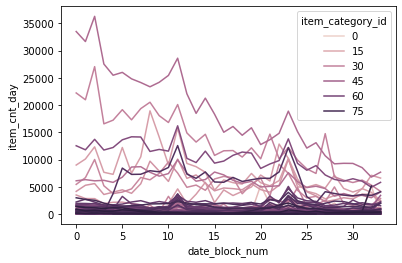

In [23]:
sns.lineplot(data = train_joined[['date_block_num','item_cnt_day', 'item_category_id']].groupby(['date_block_num','item_category_id']).sum(),
             x = 'date_block_num', y = 'item_cnt_day', hue = 'item_category_id')

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

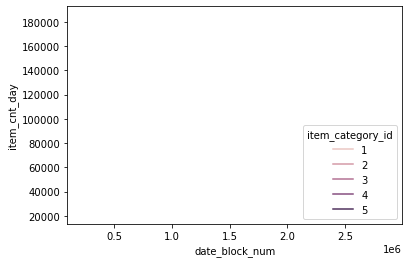

In [11]:
sns.lineplot(data = train_joined.resample('M').sum(), x = 'date_block_num', y = 'item_cnt_day', hue = 'item_category_id')